In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [2]:
font_path = '../resData/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


In [4]:
plt.style.use('ggplot')
'''
그래프에 음수기호를 유니코드가 아닌 ASCII코드로 출력되도록 하는 설정.
이 설정이 없으면 -를 인식하지 못해 깨짐현상이 발생된다. 
'''
plt.rcParams['axes.unicode_minus'] = False

''' 
엑셀파일을 데이터프레임으로 변환. header 옵션이 없으므로 첫행은
타이틀로 지정된다. 
'''
df = pd.read_excel('../resData/남북한_발전_전력량.xlsx', engine='openpyxl')
# 엑셀의 인덱스 5~8까지 즉 북한의 합계~원자력 행을 선택해서 변수에 저장
df = df.loc[5:9]
# '전력량' 컬럼을 삭제한 후 원본 데이터프레임에 적용
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
# 이 컬럼을 인덱스로 지정 후 원본 데이터프레임에 적용
df.set_index('발전 전력별', inplace=True)
# print(df)
# 클래스속성 T를 사용해서 데이터프레임을 전치
df = df.T
print(df)

발전 전력별   합계   수력   화력 원자력
1990    277  156  121   -
1991    263  150  113   -
1992    247  142  105   -
1993    221  133   88   -
1994    231  138   93   -
1995    230  142   88   -
1996    213  125   88   -
1997    193  107   86   -
1998    170  102   68   -
1999    186  103   83   -
2000    194  102   92   -
2001    202  106   96   -
2002    190  106   84   -
2003    196  117   79   -
2004    206  125   81   -
2005    215  131   84   -
2006    225  126   99   -
2007    236  133  103   -
2008    255  141  114   -
2009    235  125  110   -
2010    237  134  103   -
2011    211  132   79   -
2012    215  135   80   -
2013    221  139   82   -
2014    216  130   86   -
2015    190  100   90   -
2016    239  128  111   -


In [6]:
# 증감률(변동률) 계산을 위해 '합계'를 '총발전량'으로 이름 변경
df = df.rename(columns={'합계':'총발전량'})
df

발전 전력별,총발전량,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-
1995,230,142,88,-
1996,213,125,88,-
1997,193,107,86,-
1998,170,102,68,-
1999,186,103,83,-


In [7]:
# 총발전량 열의 데이터를 1행씩 뒤로 이동시켜 새로운 컬럼을 생성한다.
df['총발전량 - 1년'] = df['총발전량'].shift(1)
print(df)

발전 전력별 총발전량   수력   화력 원자력 총발전량 - 1년
1990    277  156  121   -      None
1991    263  150  113   -       277
1992    247  142  105   -       263
1993    221  133   88   -       247
1994    231  138   93   -       221
1995    230  142   88   -       231
1996    213  125   88   -       230
1997    193  107   86   -       213
1998    170  102   68   -       193
1999    186  103   83   -       170
2000    194  102   92   -       186
2001    202  106   96   -       194
2002    190  106   84   -       202
2003    196  117   79   -       190
2004    206  125   81   -       196
2005    215  131   84   -       206
2006    225  126   99   -       215
2007    236  133  103   -       225
2008    255  141  114   -       236
2009    235  125  110   -       255
2010    237  134  103   -       235
2011    211  132   79   -       237
2012    215  135   80   -       211
2013    221  139   82   -       215
2014    216  130   86   -       221
2015    190  100   90   -       216
2016    239  128  111   -   

In [9]:
# 증감율을 계산하여 새로운 컬럼을 생성한다.
df['증감률'] = ((df['총발전량']/df['총발전량 - 1년']) - 1) * 100
df

발전 전력별,총발전량,수력,화력,원자력,총발전량 - 1년,증감률
1990,277,156,121,-,None,NaN
1991,263,150,113,-,277,-5.054152
1992,247,142,105,-,263,-6.08365
1993,221,133,88,-,247,-10.526316
1994,231,138,93,-,221,4.524887
1995,230,142,88,-,231,-0.4329
1996,213,125,88,-,230,-7.391304
1997,193,107,86,-,213,-9.389671
1998,170,102,68,-,193,-11.917098
1999,186,103,83,-,170,9.411765


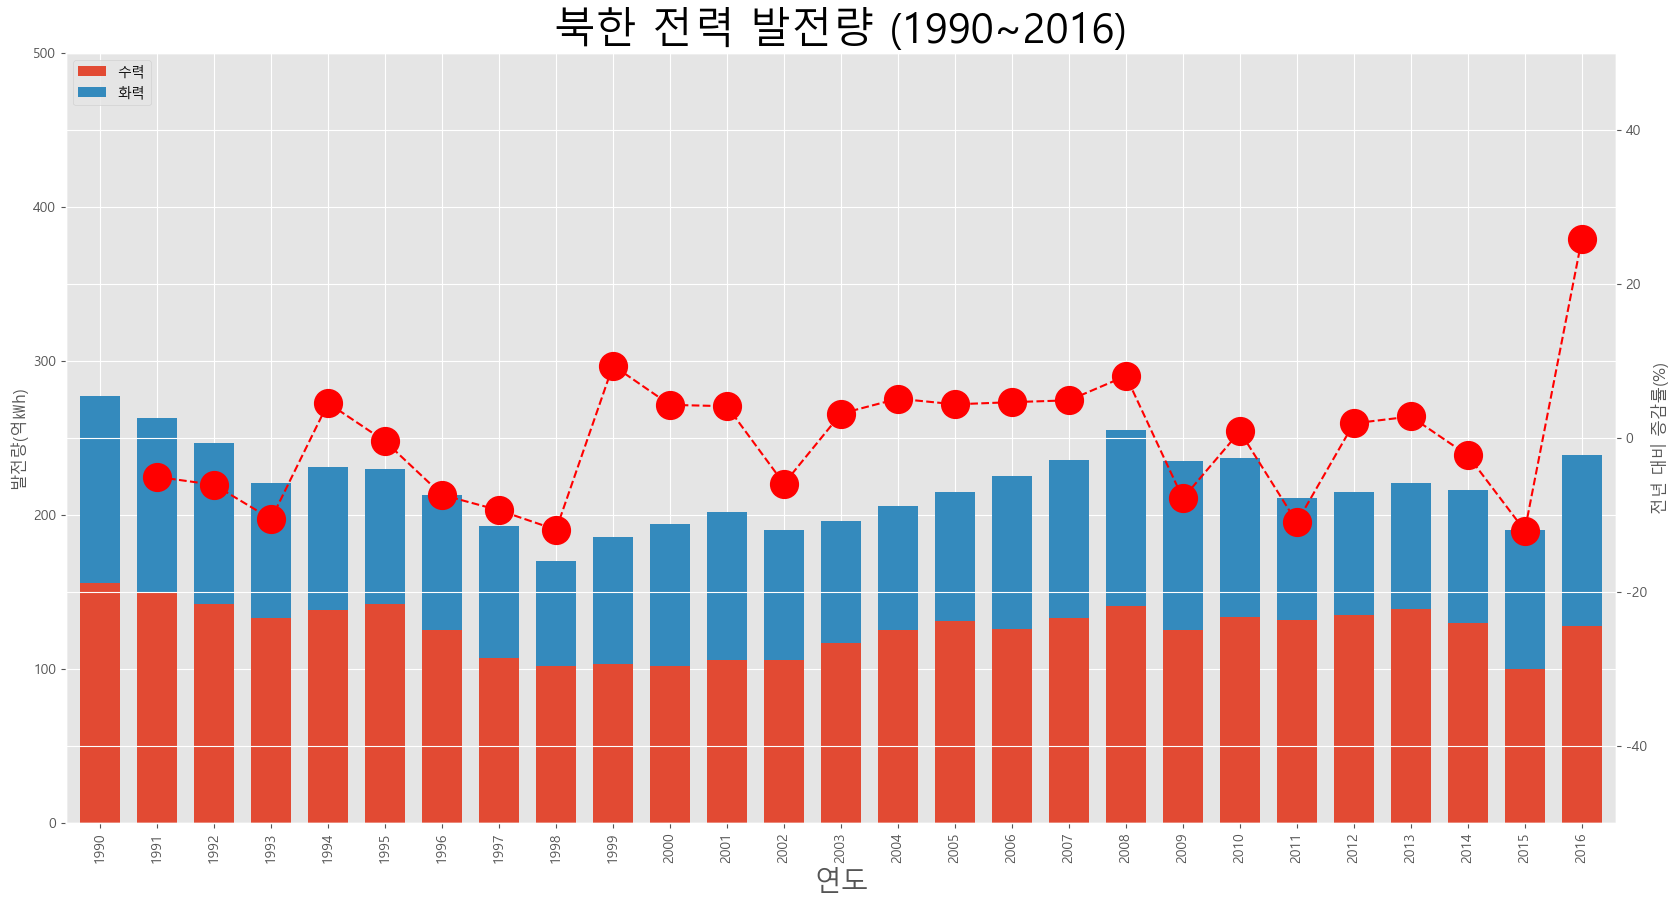

In [10]:
axe1 = df[['수력','화력']].plot(kind='bar', figsize=(20, 10), width=0.7, stacked=True)
# twinx() 함수로 Axe 객체의 복사본 생성
axe2 = axe1.twinx()
'''
생성된 복사본은 꺽은선 그래프를 표시. ls='--' 옵션은 선 스타일을
점선으로 설정한다. 
'''
axe2.plot(df.index, df.증감률, ls='--', marker='o', markersize=20,
          color='red', label='전년대비 증감률(%)')

# y축의 범위 설정
axe1.set_ylim(0, 500)
axe2.set_ylim(-50, 50)

# 라벨 설정
axe1.set_xlabel('연도', size=20)
axe1.set_ylabel('발전량(억㎾h)')
axe2.set_ylabel('전년 대비 증감률(%)')

# 타이틀 및 범례 설정
plt.title('북한 전력 발전량 (1990~2016)', size=30)
axe1.legend(loc='upper left')